In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/AirfoilSelfNoise.csv")

In [ ]:
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
df.dropna()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
df.tail(5)

,f,alpha,c,U_infinity,delta,SSPL
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [ ]:
df.shape

(1503, 6)

array([[<Axes: title={'center': 'f'}>, <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'c'}>,
        <Axes: title={'center': 'U_infinity'}>],
       [<Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'SSPL'}>]], dtype=object)

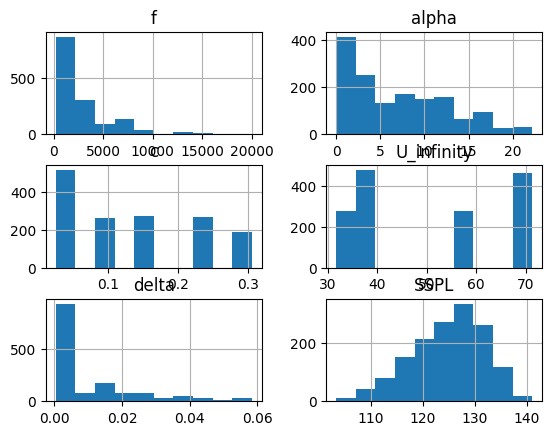

In [ ]:
df.hist()

<Axes: >

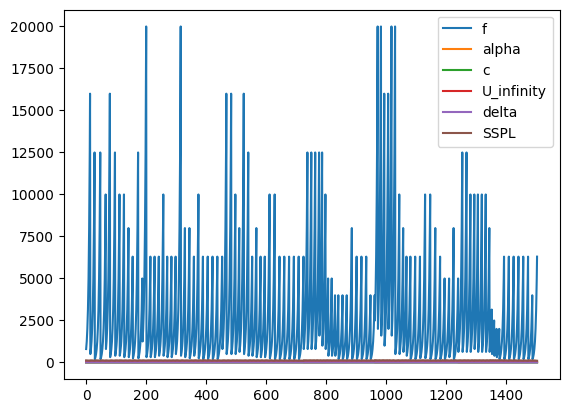

In [ ]:
df.plot()

In [ ]:
df.isnull().sum()

,0
f,0
alpha,0
c,0
U_infinity,0
delta,0
SSPL,0


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols=df.select_dtypes(include=np.number).columns

scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
print(df[numerical_cols].mean())

f             8.745869e-17
alpha         7.563995e-17
c            -1.512799e-16
U_infinity   -5.791183e-16
delta        -3.781997e-17
SSPL         -2.968868e-15
dtype: float64


In [ ]:
print(df[numerical_cols].std())

f             1.000333
alpha         1.000333
c             1.000333
U_infinity    1.000333
delta         1.000333
SSPL          1.000333
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols=df.select_dtypes(include=np.number).columns
scaler=MinMaxScaler()

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
print(df[numerical_cols].mean())

f             0.135676
alpha         0.305509
c             0.397810
U_infinity    0.483857
delta         0.185125
SSPL          0.570531
dtype: float64


<Axes: >

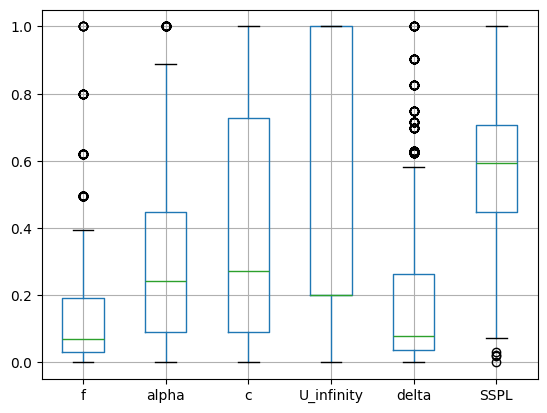

In [ ]:
df.boxplot()

In [ ]:
df.columns

Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')

In [ ]:
df.dtypes

,0
f,float64
alpha,float64
c,float64
U_infinity,float64
delta,float64
SSPL,float64


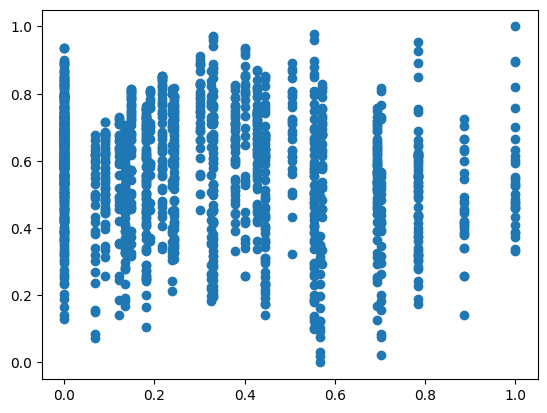

In [ ]:
x=df['alpha']
y=df['SSPL']

plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
x=df[['f', 'alpha', 'c', 'U_infinity', 'delta']]
y=df['SSPL']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("X train is: \n",x_train)

X train is: 
              f     alpha         c  U_infinity     delta
799   0.040404  0.378378  0.090909    1.000000  0.084372
1349  0.090909  0.301802  0.272727    1.000000  0.075541
1428  0.010101  0.554054  0.272727    0.601010  0.627861
1150  0.010101  0.783784  0.000000    1.000000  0.270697
1100  0.010101  0.427928  0.000000    0.000000  0.072626
...        ...       ...       ...         ...       ...
1130  0.002525  0.572072  0.000000    0.199495  0.217626
1294  0.030303  0.148649  0.272727    1.000000  0.028056
860   0.021717  0.504505  0.090909    0.199495  0.252490
1459  0.005808  0.554054  0.272727    0.000000  0.714954
1126  0.242424  0.572072  0.000000    1.000000  0.203068

[1202 rows x 5 columns]


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
print(y_pred)

[0.55260756 0.43442822 0.44982808 0.69761576 0.70135715 0.77290449
 0.50380661 0.61710831 0.70223961 0.5980988  0.77439964 0.27774018
 0.7014553  0.76554452 0.5360213  0.28813973 0.55508471 0.61666212
 0.68522073 0.74892008 0.59626435 0.57354067 0.34849431 0.70212853
 0.55025357 0.56679146 0.74703557 0.56184783 0.33210002 0.53069221
 0.56973259 0.54486543 0.58504452 0.39927904 0.4847651  0.72688647
 0.74434267 0.65813673 0.46828577 0.39215871 0.60893454 0.67244862
 0.60914246 0.5308591  0.52371518 0.70626423 0.57248861 0.43722618
 0.5252351  0.77628067 0.67456033 0.38244179 0.52943211 0.51080923
 0.61915104 0.44605382 0.53164095 0.67158529 0.5576799  0.52439552
 0.58533544 0.73517276 0.61906447 0.73656598 0.44380043 0.51368503
 0.60661116 0.50778836 0.71022295 0.62563524 0.68328558 0.75411028
 0.61312228 0.40235979 0.77477671 0.62029784 0.53586312 0.68646425
 0.74699085 0.58298516 0.51056973 0.41223821 0.58074518 0.56286227
 0.50188535 0.38718444 0.22797772 0.70212761 0.42097779 0.5123

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print(mse,mae,r2)

0.015646507349267036 0.09765242013930385 0.5582979754897284


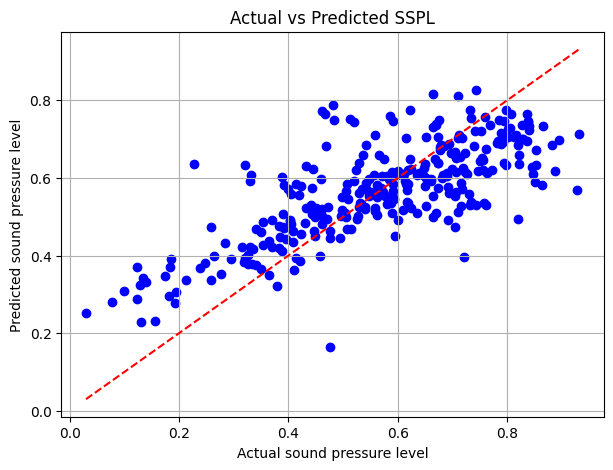

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         color='red' , linestyle='--')
plt.xlabel("Actual sound pressure level")
plt.ylabel("Predicted sound pressure level")
plt.title("Actual vs Predicted SSPL")
plt.grid(True)
plt.show()

## WINE DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/ANN_Wine.csv")

In [ ]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.dtypes

,0
Alcohol,float64
Malicacid,float64
Ash,float64
Alcalinity_of_ash,float64
Magnesium,int64
Total_phenols,float64
Flavanoids,float64
Nonflavanoid_phenols,float64
Proanthocyanins,float64
Color_intensity,float64


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malicacid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0
Color_intensity,0


In [ ]:
df.shape

(178, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols=df.select_dtypes(include=np.number).columns
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

<Axes: >

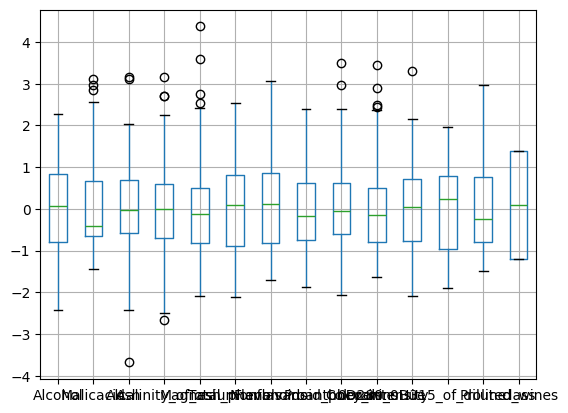

In [ ]:
df.boxplot()

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malicacid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity_of_ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': '0D280_0D315_of_diluted_wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

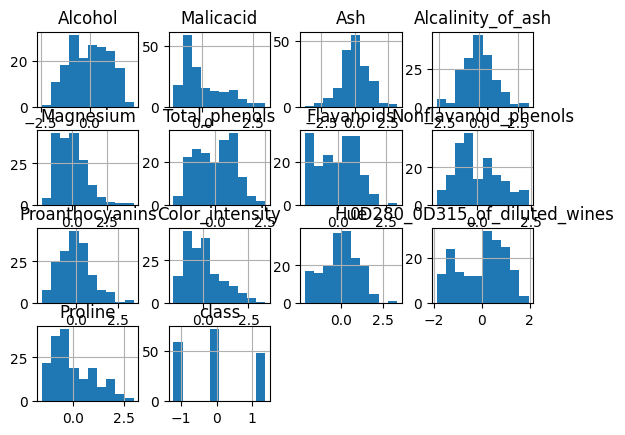

In [ ]:
df.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols=df.select_dtypes(include=np.number).columns
scaler=MinMaxScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [ ]:
x=df[['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline']]
y=df['class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x train is:\n ",x_train)

x train is:
        Alcohol  Malicacid       Ash  Alcalinity_of_ash  Magnesium  \
158  0.871053   0.185771  0.716578           0.742268   0.304348   
137  0.394737   0.942688  0.684492           0.742268   0.282609   
98   0.352632   0.065217  0.395722           0.407216   0.195652   
159  0.644737   0.183794  0.684492           0.613402   0.206522   
38   0.536842   0.150198  0.395722           0.252577   0.304348   
..        ...        ...       ...                ...        ...   
71   0.744737   0.152174  0.700535           0.742268   0.173913   
106  0.321053   0.195652  0.406417           0.432990   0.108696   
14   0.881579   0.223320  0.545455           0.072165   0.347826   
92   0.436842   0.156126  0.481283           0.520619   0.108696   
102  0.344737   0.337945  0.588235           0.536082   0.304348   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
158       0.627586    0.204641              0.754717         0.722397   
137       0.279310    0

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(y_pred)

[ 0.08474069  0.15354579  0.74599276  0.11294312  0.46611476  0.06325454
  0.48039095  0.96846816  0.23669542  0.70112761  0.07550155  0.9895496
  0.21764493  0.68597828  0.07232247  0.54972425  0.6173648   0.52689058
  0.05823091  0.47334152 -0.16612566  0.28256434  0.5795405   1.02689049
  1.10308362  1.01471621  0.51201736  0.37190325  0.54093555  0.24628715
  0.07694789  0.53009575  0.80856734  0.0386134   0.01339423 -0.11277663]


In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


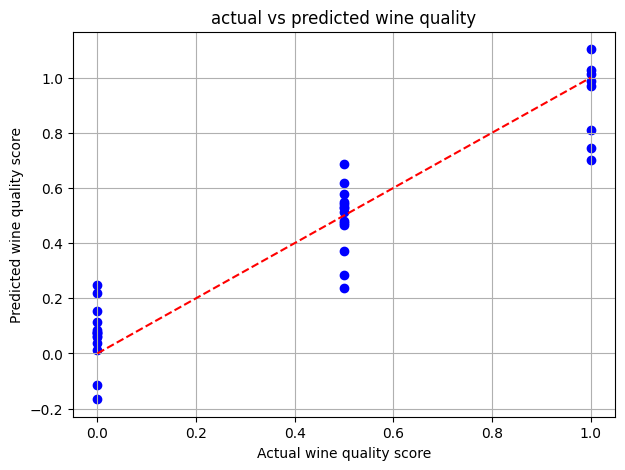

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         color='red',linestyle='--')
plt.xlabel("Actual wine quality score")
plt.ylabel("Predicted wine quality score")
plt.title("actual vs predicted wine quality")
plt.grid(True)
plt.show()

# Dataset Temperature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/temperatures - temperatures.csv")

In [ ]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
df.dtypes

,0
YEAR,int64
JAN,float64
FEB,float64
MAR,float64
APR,float64
MAY,float64
JUN,float64
JUL,float64
AUG,float64
SEP,float64


In [ ]:
df.isnull().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


In [ ]:
df.dropna()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols=df.select_dtypes(include=np.number).columns
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols=df.select_dtypes(include=np.number).columns
scaler=MinMaxScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df[['YEAR']]
y=df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC']]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("mse",mean_squared_error(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))

mse 0.024129821467051987
mae 0.11542811632224925


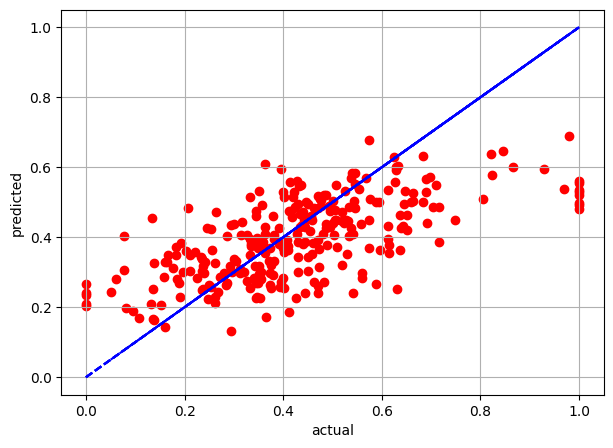

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred,color='red')
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         color='blue',linestyle='--')

plt.xlabel("actual")
plt.ylabel("predicted")
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

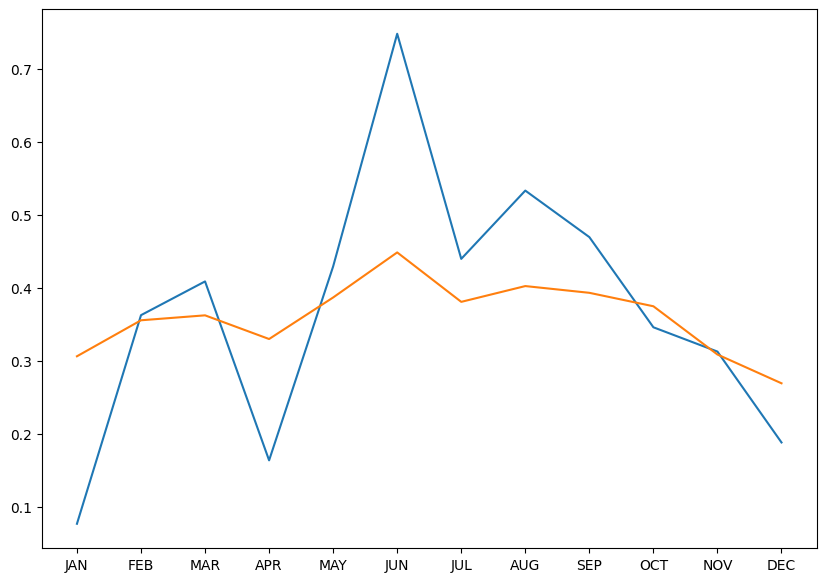

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

months=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC']

y_test_months=y_test[months]
y_pred_months=pd.DataFrame(y_pred,columns=y_test.columns)[months]

plt.figure(figsize=(10,7))
plt.plot(months,y_test_months.iloc[0,:])
plt.plot(months,y_pred_months.iloc[0,:])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Concrete Compressive Strength.csv")

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.dtypes

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age,int64
Concrete compressive strength,float64


In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Concrete compressive strength'],axis=1)
y=df['Concrete compressive strength']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

from sklearn.metrics import median_absolute_error,mean_squared_error,r2_score
mae=median_absolute_error(y_test,y_pred)
print("Mae: ",mae)

Mae:  5.86428192225403


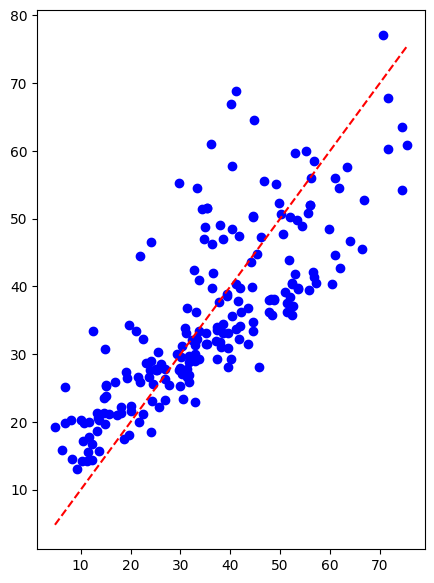

In [ ]:
plt.figure(figsize=(5,7))
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         color='red',linestyle='--')
plt.show()